# Dimensionality reduction

## Curse of Dimensionality

Data behaves differently in high dimensional space when compared to lower dimensions.

For example, As the number of dimensions increases the distance between any 2 random data points also increases, in high dimensional data, the dataset is sparse.
This means that new instances are very far away from the training data, making the predictions unreliable.

Other disadvantages of high dimensional data include - high training time, harder to visualize.

## Random Projections (gaussian random projection)

The core idea behind random projection is given in the Johnson-Lindenstrauss lemma. In which points in vector space of higher dimensional is reduced to lower dimensions in a way that approximately preserves the distances between them.

In the real world, data points in high dimensions actually lie or are close to each other in a lower dimension subspace, thus they can be projected into a lower dimension. However, this may not be the best approach for data with twists (eg - swiss roll dataset)

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import random_projection
rng = np.random.RandomState(42)
X = rng.rand(100,10000)
X.shape

(100, 10000)

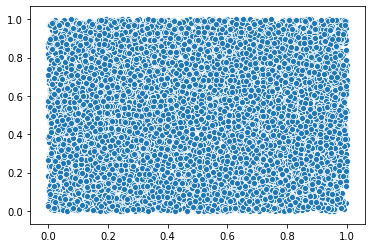

In [219]:
sns.scatterplot(X[0],X[1])

In [220]:
transformer = random_projection.GaussianRandomProjection(random_state=rng)
X_new = transformer.fit_transform(X)
X_new.shape

(100, 3947)

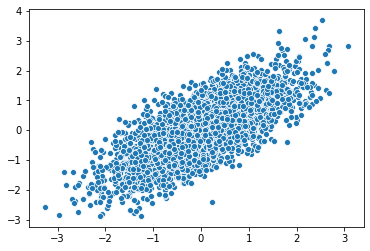

In [221]:
sns.scatterplot(X_new[0],X_new[1])

## PCA - reduced MINST and recovered

the point of Principal component analysis(PCA) is to project high dimensional data into a lower subspace in such a way that you preserve the variance. One method to do this is to pick the axis which minimizes the mean squared distance between the original dataset and its projected version.

Applying PCA to MNIST can result in compression of the image.

In [203]:
from sklearn.decomposition import PCA
from sklearn import datasets
X,y = datasets.load_digits(return_X_y=True)

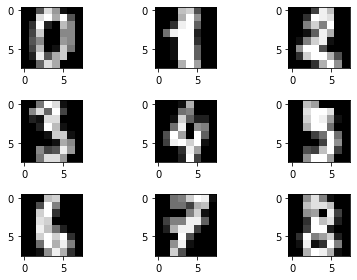

In [204]:
#plot original digits
for i in range(9):
    plt.subplot(330+1+i)
    plt.tight_layout()
    plt.imshow(X[i].reshape(8,8), cmap='gray')


In [205]:
# Applyinh PCA to reduce the dimesions to 16 (from 64)
pca = PCA(n_components = 16)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)


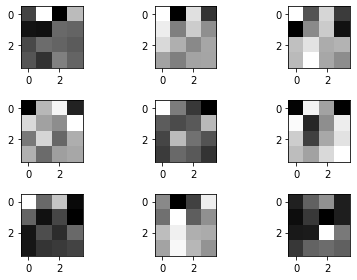

In [206]:
#plot reduced digits
for i in range(9):
    plt.subplot(330+1+i)
    plt.tight_layout()
    plt.imshow(X_reduced[i].reshape(4,4), cmap='gray')

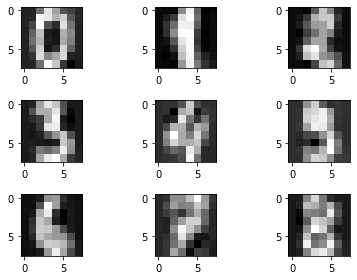

In [207]:
#plot recovered digits
for i in range(9):
    plt.subplot(330+1+i)
    plt.tight_layout()
    plt.imshow(X_recovered[i].reshape(8,8), cmap='gray')

In [208]:
#Applying logistic regression for reduced dimensions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y)

In [209]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9555555555555556

As we can see reducing the dimesions to 16( from 64) using PCA will still give a good enough result of 94.8% accuracy.